
##Paso 0: importamos las librerías que necesitamos

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import numpy as np
import seaborn as sns
!pip install seaborn

## Paso 1: Carga y Exploración Inicial del Dataset Limpio

In [ ]:
# Cargar el dataset ya tratado
df = pd.read_csv('telecomx_datos_limpios.csv')

# Revisión inicial
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## Paso 2: Codificación de Variables Categóricas con One-Hot Encoding

In [ ]:
# Paso 2: Aplicar One-Hot Encoding a las columnas categóricas
columnas_categoricas = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificación
print("✅ Dataset codificado. Nuevas dimensiones:", df.shape)
df.head()

✅ Dataset codificado. Nuevas dimensiones: (7043, 26)


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Cuentas_Diarias,Total_Servicios,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,2.19,4,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,2.00,3,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,2.46,2,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,3.27,5,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,2.80,3,False,True,False,False,False,False,False,True


## Paso 3: Análisis de Distribución de la Variable Objetivo (Churn)

In [ ]:
# Verificar proporción de cancelación
proporcion_churn = df['Churn'].value_counts(normalize=True).round(3) * 100

# Mostrar resultados
print("📊 Proporción de clientes según Churn:\n")
print(proporcion_churn)

📊 Proporción de clientes según Churn:

Churn
0    73.5
1    26.5
Name: proportion, dtype: float64


## Paso 4: Balanceo de Clases con SMOTE

In [ ]:
# aplicación de Smote

# Separación de X (features) e y (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# División en entrenamiento y prueba (antes de aplicar SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTE SOLO en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificación del balanceo
print("🔍 Proporción original de clases en y_train:")
print(y_train.value_counts(normalize=True).round(3) * 100)

print("\n✅ Proporción después de SMOTE:")
print(y_train_smote.value_counts(normalize=True).round(3) * 100)

🔍 Proporción original de clases en y_train:
Churn
0    73.5
1    26.5
Name: proportion, dtype: float64

✅ Proporción después de SMOTE:
Churn
0    50.0
1    50.0
Name: proportion, dtype: float64


##Paso 5: Normalización de Variables Predictoras

In [ ]:
# Normalización de los datos
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar el set de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transformar el set de prueba (usar mismo scaler)
X_test_scaled = scaler.transform(X_test)

## Paso 6: Análisis de Correlación entre Variables

🔎 Correlación con Churn:
Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
Cuentas_Diarias                          0.193412
Charges_Monthly                          0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV                              0.063228
StreamingMovies                          0.061382
MultipleLines                            0.040102
PhoneService                             0.011942
gender_Male                             -0.008612
DeviceProtection                        -0.066160
Total_Servicios                         -0.067264
OnlineBackup                            -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport              

/tmp/ipython-input-1504714019.py:12: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


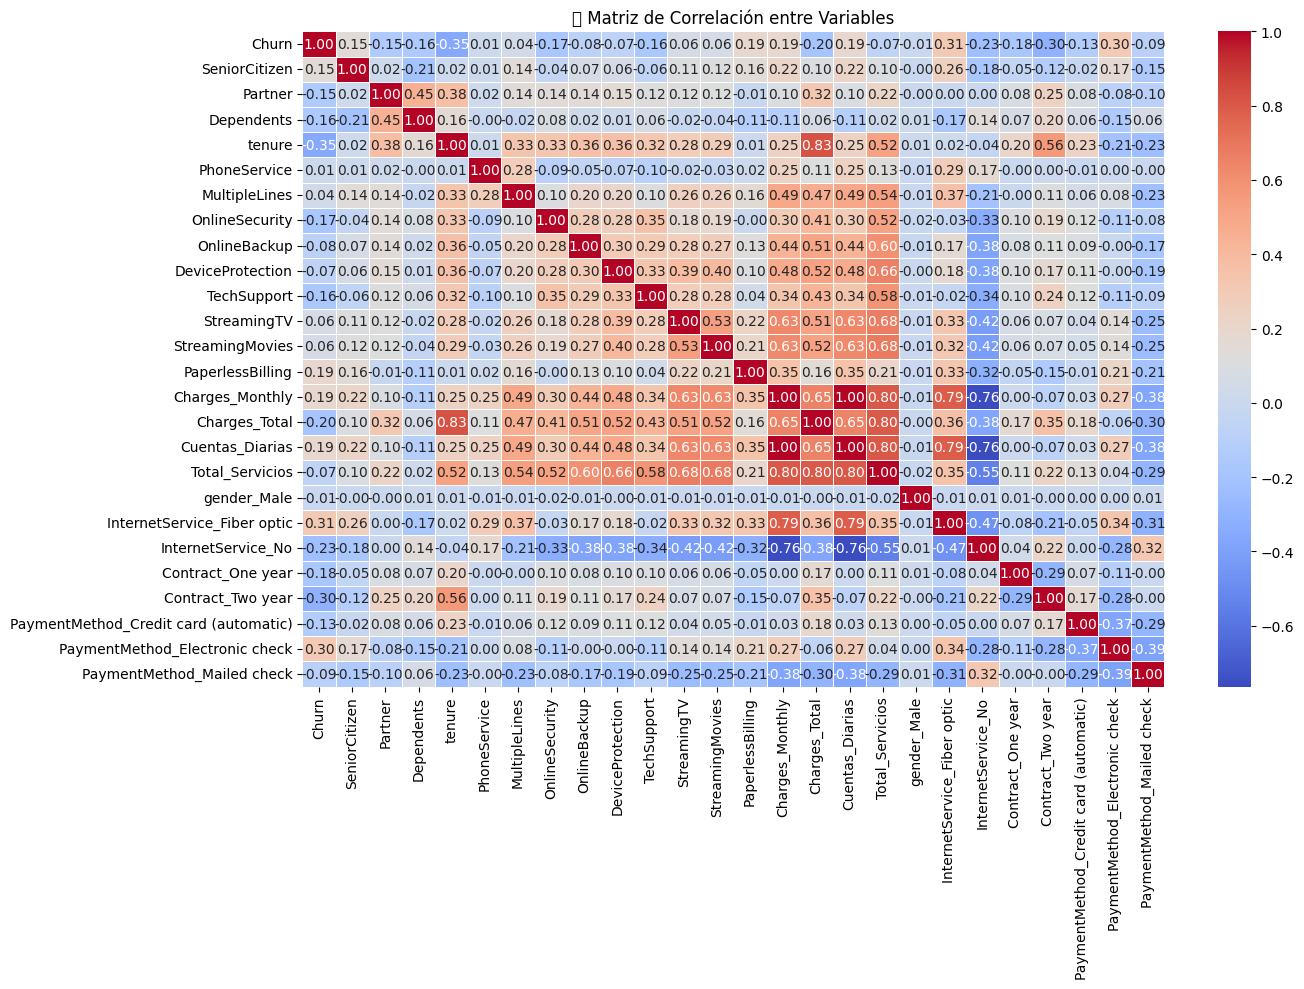

In [ ]:
# Matriz de correlación de todo el dataframe (numérico)
correlaciones = df.corr(numeric_only=True)

# Mostrar correlación de todas las variables con Churn, ordenadas
print("🔎 Correlación con Churn:")
print(correlaciones['Churn'].sort_values(ascending=False))

# Heatmap completo de correlación (opcional)
plt.figure(figsize=(14, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔗 Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()


##Paso 7: Análisis Dirigido

### 7.1 Visualización de Tiempo de Contrato y Cancelación

/tmp/ipython-input-99687514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette=['#94A683', '#F67280'])


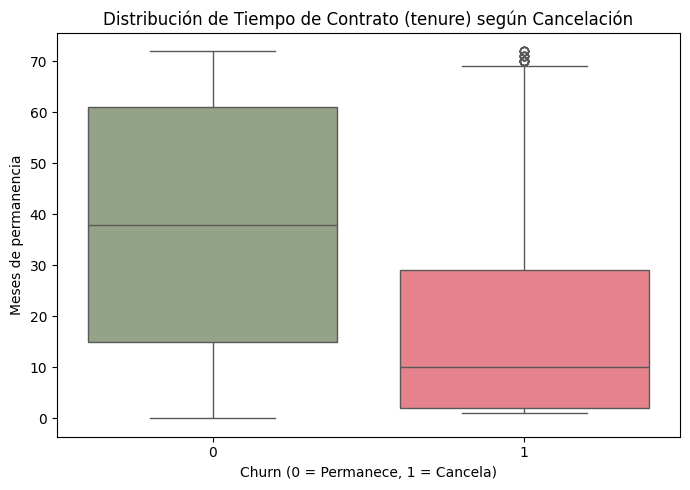

In [ ]:
# analisis Dirigido a través de gráficos

# bloxpot - Timpo de Contrato vs Cancelación
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Churn', y='tenure', palette=['#94A683', '#F67280'])
plt.title('Distribución de Tiempo de Contrato (tenure) según Cancelación')
plt.xlabel('Churn (0 = Permanece, 1 = Cancela)')
plt.ylabel('Meses de permanencia')
plt.tight_layout()
plt.show()


####Explicación Tenure vs Churn (Boxplot)

Se observa que los clientes que cancelaron su servicio (Churn = 1) tienen, en promedio, menos tiempo de permanencia en la empresa. Esto sugiere que los primeros meses son críticos y existe un mayor riesgo de cancelación temprana.

🔎 Insight clave: Retener a los clientes durante los primeros 12–18 meses podría disminuir significativamente la tasa de churn.

### 7.2 Visualización de Gasto Total y Cancelación

/tmp/ipython-input-720499493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Charges_Total', palette=['#94A683', '#F67280'])


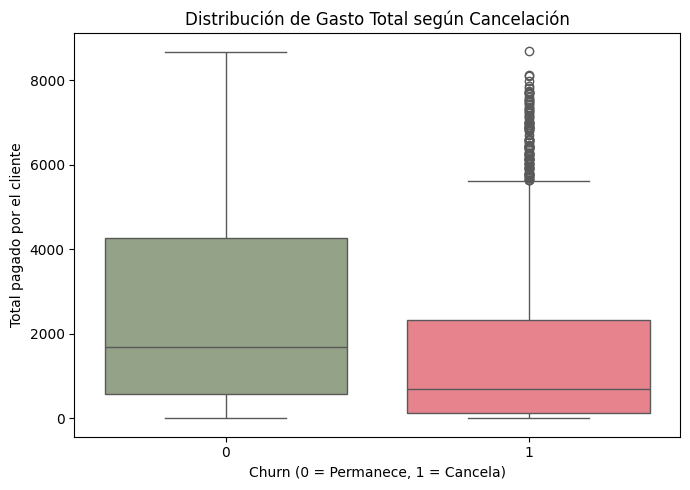

In [ ]:
# boxplot gasto total vs cancelación

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='Churn', y='Charges_Total', palette=['#94A683', '#F67280'])
plt.title('Distribución de Gasto Total según Cancelación')
plt.xlabel('Churn (0 = Permanece, 1 = Cancela)')
plt.ylabel('Total pagado por el cliente')
plt.tight_layout()
plt.show()


####Explicación Charges_Total vs Churn (Boxplot)

Aquellos que cancelaron tienden a haber realizado un gasto total significativamente menor que quienes permanecen. Esto se relaciona directamente con el tiempo de permanencia, pero también puede implicar que clientes de menor facturación son más propensos a abandonar.

🔎 Insight clave: Implementar estrategias específicas para fidelizar a clientes de bajo gasto podría reducir la pérdida.

### 7.3 Visualización de la Relación entre Tenure y Gasto Total según Cancelación

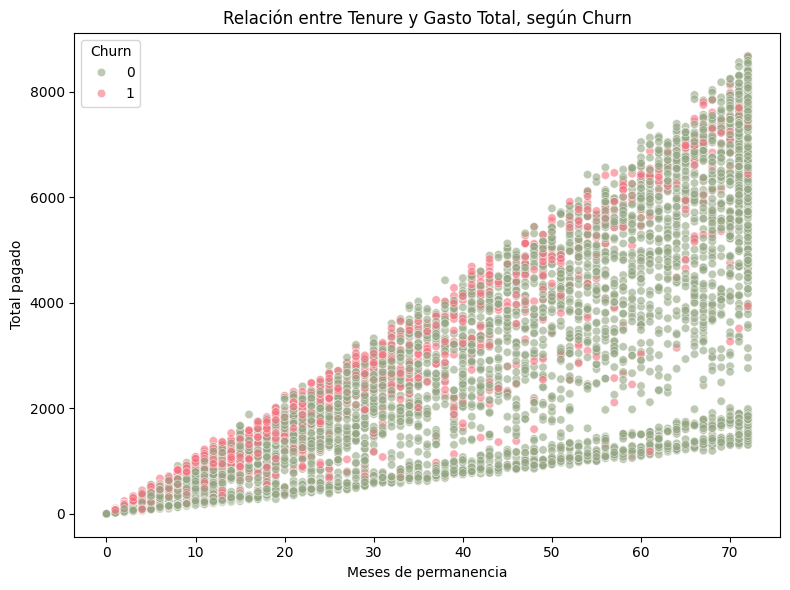

In [ ]:
#scatter plot tiempo de contrato xs gasto total

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='Charges_Total', hue='Churn', palette=['#94A683', '#F67280'], alpha=0.6)
plt.title('Relación entre Tenure y Gasto Total, según Churn')
plt.xlabel('Meses de permanencia')
plt.ylabel('Total pagado')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


#### Explicación de Scatterplot (Tenure vs Charges_Total)

La mayoría de los clientes que cancelaron se concentran en la esquina inferior izquierda (bajo tenure y bajo gasto total). Esto refuerza la idea de que el perfil de riesgo incluye clientes nuevos con bajo consumo.

🔎 Insight clave: El modelo predictivo debería prestar especial atención a clientes nuevos con bajo gasto acumulado.

## Paso 8: División del Conjunto de Datos en Entrenamiento y Prueba

In [ ]:
# Separación de los Datos
# 🎯 Separación de variables predictoras (X) y objetivo (y)
X = df.drop('Churn', axis=1)  # Ya no es necesario eliminar 'customerID'
y = df['Churn']               # Variable objetivo

# ✂️ División del conjunto de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Verificación del tamaño de los conjuntos
print(f"📊 Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"📊 Tamaño del conjunto de prueba: {X_test.shape}")

📊 Tamaño del conjunto de entrenamiento: (5634, 25)
📊 Tamaño del conjunto de prueba: (1409, 25)


## Paso 9 Entrenamiento y evaluación de modelos

### Paso 9.1 Modelo de Regresión Logística

🔍 Matriz de confusión:
[[865 170]
 [134 240]]

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1035
           1       0.59      0.64      0.61       374

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409

✅ Accuracy: 0.7842441447835344
📈 ROC-AUC: 0.8256542406158774


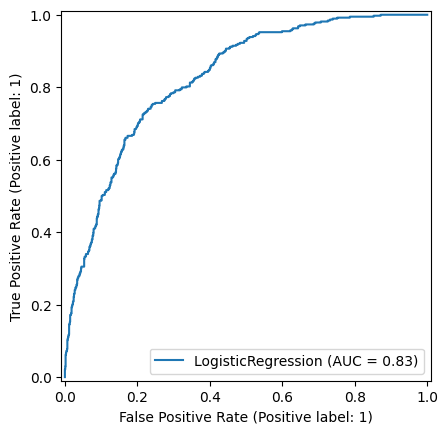

In [ ]:
# 📌 Paso 1: Inicializar el modelo
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)

# 📌 Paso 2: Entrenar el modelo
modelo_logistico.fit(X_train_scaled, y_train_smote)

# 📌 Paso 3: Realizar predicciones
y_pred_log = modelo_logistico.predict(X_test_scaled)
y_prob_log = modelo_logistico.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de clase 1 (churn)

# 📌 Paso 4: Evaluar el rendimiento
print("🔍 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_log))

print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred_log))

print("✅ Accuracy:", accuracy_score(y_test, y_pred_log))
print("📈 ROC-AUC:", roc_auc_score(y_test, y_prob_log))

# 📌 Paso 5: Visualizar curva ROC
RocCurveDisplay.from_estimator(modelo_logistico, X_test_scaled, y_test)


#### Discusiones Modelo de Regresión Logística

El modelo de Regresión Logística entrenado para predecir la cancelación de clientes en Telecom X mostró un rendimiento general satisfactorio, con una precisión del 78,4% y un área bajo la curva ROC (AUC) de 0,83, lo cual indica una buena capacidad de discriminación entre clientes que cancelan y los que no.

Sin embargo, se identificó un desbalance en el desempeño por clase:

El modelo predice con alta precisión a los clientes que permanecen (Clase 0), lo cual es útil pero esperado.

Para la clase positiva (clientes que cancelan), el modelo logró un recall de 64%, lo que implica que todavía falla en identificar un porcentaje importante de clientes propensos a cancelar. Esta limitación es relevante, ya que el objetivo principal del negocio es anticipar posibles cancelaciones para aplicar estrategias de retención.

Gracias a la implementación de técnicas de balanceo como SMOTE y la normalización de los datos, se logró mitigar parcialmente el sesgo del modelo hacia la clase mayoritaria.

🧠 Conclusión final: Aunque el modelo de regresión logística entrega resultados aceptables como línea base, se recomienda probar modelos más complejos como Random Forest o XGBoost, que podrían capturar mejor las no linealidades en los datos y mejorar la capacidad de detección de churn.

### Paso 9.2 Modelo Random Forest

🔍 Matriz de confusión:
[[932 103]
 [199 175]]

📋 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409

✅ Accuracy: 0.7856635911994322
📈 ROC-AUC: 0.8241093802474876


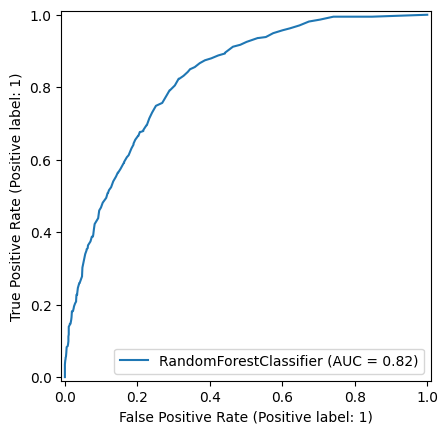

In [ ]:
# 📌 Paso 1: Inicializar el modelo
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)

# 📌 Paso 2: Entrenar el modelo (usamos X_train y y_train directamente, SIN escalar)
modelo_rf.fit(X_train, y_train)

# 📌 Paso 3: Realizar predicciones
y_pred_rf = modelo_rf.predict(X_test)
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1 (churn)

# 📌 Paso 4: Evaluar el rendimiento
print("🔍 Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

print("✅ Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📈 ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

# 📌 Paso 5: Visualizar curva ROC
RocCurveDisplay.from_estimator(modelo_rf, X_test, y_test)

#### Discusiones del Modelo Random Forest

El modelo de Random Forest mostró un desempeño sólido en la predicción de cancelación de clientes, alcanzando una precisión general (accuracy) del 78,6% y un AUC de 0,82, lo que indica una buena capacidad para distinguir entre clientes que permanecen y los que cancelan.

Sin embargo, al analizar métricas específicas, se observa que:

El modelo logra una alta precisión en la predicción de clientes que cancelan (63%), lo que significa que, cuando predice una cancelación, suele acertar.

No obstante, su recall para la clase de cancelación es de solo 47%, lo que indica que el modelo deja fuera a una parte importante de los clientes que efectivamente se van.

Este comportamiento es característico de modelos basados en árboles, que priorizan decisiones robustas y suelen ser menos sensibles a clases desbalanceadas, incluso después de aplicar técnicas como SMOTE.

En resumen, Random Forest es un modelo confiable y balanceado, pero menos efectivo que la regresión logística para identificar a todos los clientes propensos a cancelar, lo cual puede ser relevante si el objetivo es implementar acciones preventivas.

## Paso 10: Comparación de Métricas entre Regresión Logística y Random Forest

In [29]:
# Crear diccionario con métricas
resultados_modelos = {
    'Métrica': ['Accuracy', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)', 'ROC-AUC'],
    'Regresión Logística': [0.784, 0.59, 0.64, 0.61, 0.83],
    'Random Forest': [0.786, 0.63, 0.47, 0.54, 0.82]
}

# Crear DataFrame
df_resultados = pd.DataFrame(resultados_modelos)

# Mostrar la tabla
print("📊 Comparación de Desempeño entre Modelos")
display(df_resultados)


📊 Comparación de Desempeño entre Modelos


,Métrica,Regresión Logística,Random Forest
0,Accuracy,0.784,0.786
1,Precision (Clase 1),0.590,0.630
2,Recall (Clase 1),0.640,0.470
3,F1-score (Clase 1),0.610,0.540
4,ROC-AUC,0.830,0.820


### **Paso 10.1🔍 Análisis Comparativo**

####**Precisión (Clase 1):** Random Forest muestra una mayor precisión (0.63 vs 0.59), lo que indica que sus predicciones positivas (clientes que cancelan) son más confiables.

####**Recall (Clase 1):** La Regresión Logística tiene un desempeño significativamente mejor (0.64 vs 0.47), detectando más casos reales de cancelación.

####**F1-score:** La Regresión Logística supera en balance entre precisión y recall (0.61 vs 0.54), siendo más equilibrada.

####**ROC-AUC:** Ambos modelos tienen buen desempeño general, pero la Regresión Logística presenta una ligera ventaja (0.83 vs 0.82), lo que indica una mejor capacidad de discriminación entre clases.

### **Paso 10.2: Conclusión General**

####**Modelo con mejor desempeño:**
La Regresión Logística se destaca como el modelo más sólido en este caso, especialmente si el objetivo es detectar cancelaciones reales de clientes, aunque su precisión sea algo menor.

####**Sobreajuste (Overfitting):**
No se evidencian signos claros de sobreajuste en ninguno de los modelos, ya que los valores de rendimiento son consistentes en el conjunto de prueba.

####**Subajuste (Underfitting):**
Random Forest podría estar subajustando ligeramente, como se observa en su bajo recall (0.47), posiblemente debido a parámetros por defecto poco optimizados. Se recomienda realizar ajuste de hiperparámetros para mejorar su sensibilidad.

###**🛠️ Recomendaciones Futuras**

Aplicar GridSearchCV o RandomizedSearchCV sobre Random Forest para encontrar una configuración más eficiente.

Explorar modelos adicionales como XGBoost o LightGBM.

Analizar las variables más importantes que contribuyen a la predicción.

## Paso 11: Análisis de importancia de variables

### 11.1 Regresión Logística – Análisis de Coeficientes

#### 11.1.1 Tabla con las variables más influyentes para el modelo Regresión Logística

In [32]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_logistico.coef_[0]
})

# Ordenar por influencia (en valor absoluto)
coeficientes['Importancia_Absoluta'] = np.abs(coeficientes['Coeficiente'])
coeficientes = coeficientes.sort_values(by='Importancia_Absoluta', ascending=False)

# Mostrar top 10
print("📊 Top 10 variables más influyentes (Regresión Logística):")
coeficientes[['Variable', 'Coeficiente']].head(10)

📊 Top 10 variables más influyentes (Regresión Logística):


,Variable,Coeficiente
16,Total_Servicios,5.395027
3,tenure,-1.878927
11,StreamingMovies,-1.811100
10,StreamingTV,-1.747263
4,PhoneService,-1.669440
9,TechSupport,-1.650398
7,OnlineBackup,-1.625104
6,OnlineSecurity,-1.590580
8,DeviceProtection,-1.537841
5,MultipleLines,-1.513809


#### 11.1.2 Visualización de las variables más influyentes para el modelo Regresión Logística

/tmp/ipython-input-2207257964.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeficientes.head(10), x='Coeficiente', y='Variable', palette='coolwarm')
/tmp/ipython-input-2207257964.py:8: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


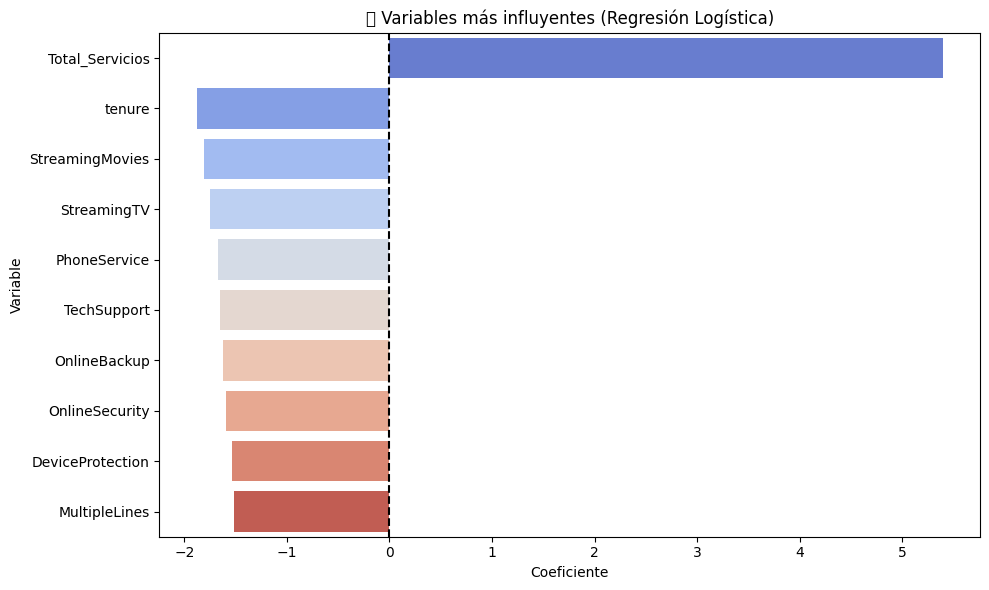

In [40]:
# Visualización de los coeficientes más influyentes
plt.figure(figsize=(10,6))
sns.barplot(data=coeficientes.head(10), x='Coeficiente', y='Variable', palette='coolwarm')
plt.title('🎯 Variables más influyentes (Regresión Logística)')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.axvline(0, color='black', linestyle='--')  # Línea en 0 para distinguir signo
plt.tight_layout()
plt.show()


### 11.2 Random Forest – Análisis de Coeficientes

#### 11.2.1 Tabla con las variables más influyentes para el modelo Random Forest

In [41]:
# Crear DataFrame con importancias
importancias_rf = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
})

# Ordenar por importancia descendente
importancias_rf = importancias_rf.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

# Mostrar las 10 variables más influyentes
print("📋 Top 10 variables más importantes (Random Forest):")
display(importancias_rf.head(10))


📋 Top 10 variables más importantes (Random Forest):


,Variable,Importancia
0,Charges_Total,0.171888
1,tenure,0.160350
2,Charges_Monthly,0.136094
3,Cuentas_Diarias,0.109556
4,InternetService_Fiber optic,0.046621
5,PaymentMethod_Electronic check,0.040011
6,Total_Servicios,0.032511
7,Contract_Two year,0.026785
8,gender_Male,0.024077
9,PaperlessBilling,0.023776


#### 11.2.2 Visualización de las variables más influyentes para el modelo Random Forest

/tmp/ipython-input-3011326761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importancias_rf.head(10), x='Importancia', y='Variable', palette='viridis')
/tmp/ipython-input-3011326761.py:7: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


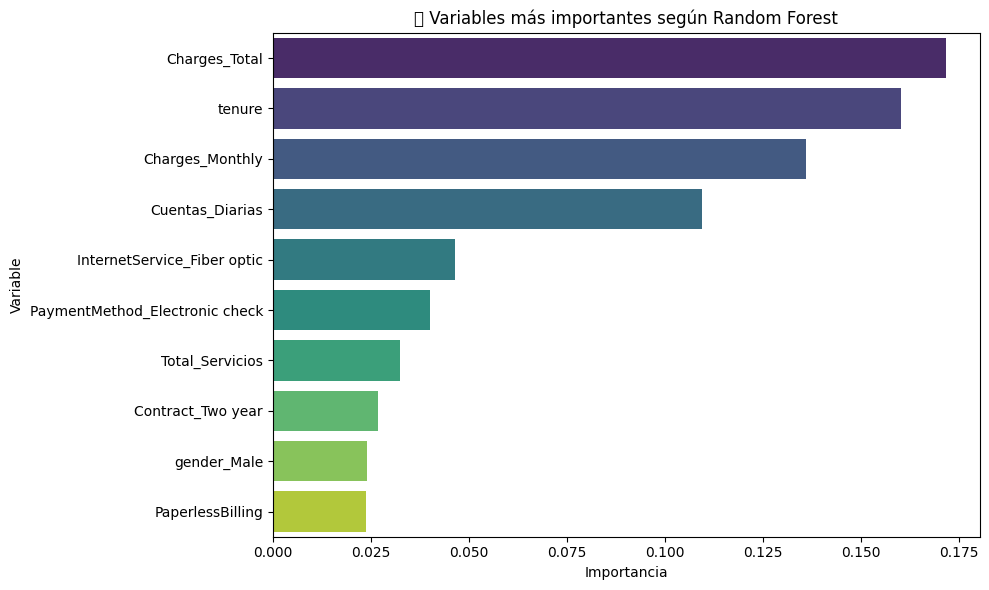

In [42]:
# Visualización
plt.figure(figsize=(10,6))
sns.barplot(data=importancias_rf.head(10), x='Importancia', y='Variable', palette='viridis')
plt.title('🎯 Variables más importantes según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


## **Paso 12: Análisis Comparativo de Variables Más Influyentes**


###**✅ Coincidencias entre ambos modelos**

Ambos modelos coinciden en destacar algunas variables como altamente influyentes para la predicción de la cancelación de clientes, lo cual refuerza su relevancia:

Variable	Interpretación clave
tenure	Clientes con más tiempo tienen menor probabilidad de cancelar.
Total_Servicios	En la regresión logística tiene un fuerte coeficiente positivo, indicando mayor retención. En Random Forest tiene menor importancia, pero igual aparece.
Charges_Monthly	Cuotas mensuales más altas están asociadas con mayor churn.
PaperlessBilling	Puede estar relacionada con clientes más digitales y con mayor rotación.

### **🔁 Diferencias destacadas entre modelos**
Regresión Logística	Random Forest
Enfatiza servicios específicos como: StreamingMovies, StreamingTV, PhoneService, OnlineBackup, TechSupport.	Da más peso a variables de costos (Charges_Total, Charges_Monthly) y contratos (Contract_Two year).
Tiende a favorecer interpretabilidad directa vía coeficientes.	Favorece interacciones no lineales y combinaciones de variables.

###**📊 Implicancias para el negocio**

Estrategia basada en servicios contratados: Según la regresión logística, la presencia o ausencia de servicios como soporte técnico, backup online o servicios de streaming tiene un peso considerable en la decisión de cancelar. Esto puede usarse para diseñar planes de retención más ajustados a servicios.

Estrategia basada en cobros y contratos: Según Random Forest, los montos cobrados (Charges_Total, Charges_Monthly) y el tipo de contrato son más determinantes. Esto indica que se podrían revisar políticas tarifarias o incentivos para clientes con contratos cortos.

### **🧠 Conclusión del análisis cruzado**

Ambos modelos aportan perspectivas complementarias:

***Regresión Logística*** es más útil para interpretar el "por qué" del churn, ya que los coeficientes indican la dirección del efecto (positivo o negativo).

***Random Forest*** es más robusto para capturar relaciones no lineales y complejas, y destaca el impacto económico (cobros y duración del cliente).

###**💡 Recomendación:**
Combinar ambas perspectivas podría llevar a estrategias más efectivas de retención: utilizar insights de regresión logística para campañas personalizadas y usar Random Forest para segmentación basada en impacto financiero.

## **Paso 13:📝 Conclusión Final del Análisis de Cancelación de Clientes**



Tras aplicar modelos de Regresión Logística y Random Forest para predecir la cancelación de clientes, fue posible identificar las principales variables que influyen en el churn y evaluar el desempeño de cada modelo.

###**🔍 Principales factores que influyen en la cancelación:**

***Tenure (Antigüedad del cliente)***

En ambos modelos, una menor antigüedad se asocia fuertemente con una mayor probabilidad de cancelación.

Esto indica que los clientes más recientes son más propensos a abandonar el servicio.

***Total de servicios contratados (Total_Servicios)***

En la regresión logística, esta variable fue la más influyente de forma positiva. Clientes que utilizan más servicios tienen menor propensión a cancelar.

Implica que un mayor grado de vinculación con la compañía mejora la retención.

***Cargos mensuales y totales (Charges_Monthly y Charges_Total)***

En el modelo de Random Forest, fueron las variables más importantes. Clientes con cargos elevados pueden mostrar más sensibilidad al precio.

***Tipo de contrato (Contract_Two year)***

La duración del contrato también juega un rol importante. Los contratos de mayor plazo (como dos años) se asocian a menores tasas de cancelación.

***Servicios específicos como Streaming, Backup, Soporte Técnico, etc.***

La ausencia de servicios como StreamingMovies, TechSupport, OnlineBackup y PhoneService está correlacionada con mayor cancelación según la regresión logística.

### **📊 Comparación de Métricas entre Modelos**

| Métrica               | Regresión Logística | Random Forest |
|-----------------------|---------------------|----------------|
| Accuracy              | 0.784               | 0.786          |
| Precision (Clase 1)   | 0.590               | 0.630          |
| Recall (Clase 1)      | 0.640               | 0.470          |
| F1-score (Clase 1)    | 0.610               | 0.540          |
| ROC-AUC               | 0.830               | 0.820          |


Regresión Logística destacó por su mejor equilibrio entre precisión, recall y AUC.

Random Forest logró una leve mejora en exactitud y precisión, pero sacrificando capacidad para detectar casos reales de cancelación (recall).

###**💡 Estrategias de retención propuestas**

Con base en los hallazgos, se proponen las siguientes acciones:

***Fidelización temprana***
Diseñar campañas de retención específicas para los clientes nuevos (baja tenure), como promociones, llamadas de bienvenida o beneficios por permanencia en los primeros 3 meses.

***Incentivar la contratación de múltiples servicios***
Ofrecer paquetes combinados o promociones que incentiven el uso de más servicios, aumentando el grado de dependencia del cliente con la compañía.

***Revisión de políticas tarifarias***
Identificar segmentos con cargos mensuales elevados y evaluar si el valor percibido justifica el costo. Ofrecer alternativas más económicas a clientes en riesgo de cancelación.

***Fomentar contratos de largo plazo***
Promover contratos anuales o bienales mediante descuentos o beneficios exclusivos, ya que están asociados a una menor tasa de cancelación.

***Mejorar la experiencia en servicios clave***
Fortalecer servicios como soporte técnico, backup online y streaming, especialmente en clientes que los usan poco o nada. Podrían ser puntos de fricción que motiven el abandono.

###**🧠 Conclusión general**

La combinación de modelos nos permitió no solo identificar patrones de cancelación, sino también comprender cómo ciertas variables influyen de manera distinta según el enfoque. El análisis muestra que no hay un único motivo de cancelación, sino un conjunto de factores que interactúan entre sí. Integrar estos hallazgos en las estrategias de negocio permitirá diseñar acciones focalizadas, con mayor probabilidad de éxito en la retención de clientes.